# Exercise 05: Homework Assignment 2.1 (w/o solution)

Homework "ML Fundamentals & Implementation"

Please add your implementations in the indicated cells below.

In [1]:
import numpy as np
import pandas as pd

import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import sklearn.cluster
import sklearn.metrics.pairwise

import statsmodels.regression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 1_000

In [3]:
np.random.seed(501)

<br>
<br>

## Binary Cross-Entropy Loss

$
{\displaystyle Loss= - \frac 1 N  \sum _{i} y_i\,\log p(x_i) + (1-y_i)\,\log \big(1-p(x_i)\big)}
$

Binary cross-entropy loss (also called log loss) is a metric that is often used for the evaluation of a predicted classification. As the name states binary cross-entropy evaluates classification with two classes. The log loss is used to penalize bad predictions. The loss increases exponentially, the lower the probability gets to 0.

A possible marketing application could be the classification whether a customer will churn or not. Another application could be the prediction if a customer will return ordered clothes or not.

![title](cross_entropy_loss.png)

[click here to get to the source](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

### Data

In [4]:
X, y = sklearn.datasets.make_classification(
    n_samples=N,
    n_classes=2,
    n_features=20,
    random_state=501
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame({
    "y": y_test,
    "p": model1.predict_proba(X_test)[:,1]
})

### sklearn

In [5]:
loss_skl = sklearn.metrics.log_loss(df["y"], df["p"])
loss_skl

0.36328772771094564

### Manual implementation

In [6]:
def cross_entropy(no_obs, actual_val, pred_prob):

  total_log = 0
  j = 0

  for i in actual_val:
    
    log = -(1/no_obs)*(i*np.log(pred_prob[j]) + ((1-i)*np.log(1-pred_prob[j])))
        
    j = j + 1
    total_log = total_log + log

  print(total_log)

In [12]:
cross_entropy(300, df.y, df.p)

0.3632877277109455


<br>
<br>

## R<sup>2</sup> Score (Coefficient of Determination)

### Mathematical

$
{\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}
$

with 

$
\quad {\displaystyle \color{red}{SS_{\text{tot}}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}
$

$
\quad {\displaystyle \color{blue}{SS_{\text{res}}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}
$

$
\quad {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}
$

### Visual

<center><img src=../img/r2.png width="600"></center>

[(Source)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [7]:
X, y, coef = sklearn.datasets.make_regression(
    n_samples=N,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=501
)

lr = sklearn.linear_model.LinearRegression()
lr_res = lr.fit(X, y)

df = pd.DataFrame({
    "y": y,
    "yhat": lr.predict(X),
})

coef, lr.coef_

(array(25.87264287), array([26.18812014]))

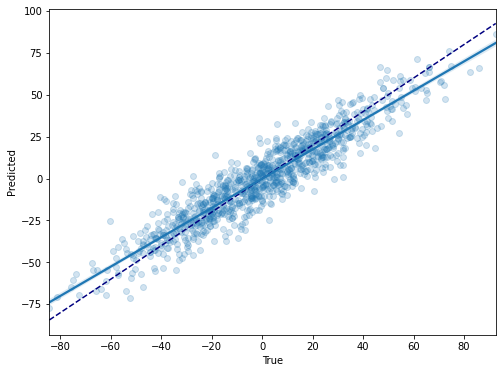

In [8]:
plt.figure(figsize=(8,6))
y_min = df.values.min()
y_max = df.values.max()
plt.plot(
    [y_min, y_max],
    [y_min, y_max],
    color="navy",
    linestyle="--"
)
sns.regplot(
    x="y",
    y="yhat",
    data=df,
    scatter_kws={"alpha": 0.2}
)
plt.xlabel("True")
_ = plt.ylabel("Predicted")

### sklearn

In [9]:
r2_skl = sklearn.metrics.r2_score(
    df["y"],
    df["yhat"]
)

### Manual implementation

In [10]:
# please add your implementation here

<br>
<br>

## Silhouette

### Mathematical

For each point $i$:

$
{\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}
$

with

$
\quad {\displaystyle a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)}
$

$
\quad {\displaystyle b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)}
$


### Visual

<center><img src=../img/silhouette.png width="500"></center>


### Data

In [11]:
X, y = sklearn.datasets.make_blobs(
    n_samples=N,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=501
)

### sklearn

In [12]:
clusterer = sklearn.cluster.KMeans(
    n_clusters=3,
    random_state=501
)
cluster_labels = clusterer.fit_predict(X)
sil_skl = sklearn.metrics.silhouette_score(
    X,
    cluster_labels
)
sil_skl

0.693663427967365

In [13]:
sil_samples_skl = sklearn.metrics.silhouette_samples(
    X,
    cluster_labels
)

### Manual implementation

In [14]:
# please add your implementation here

In [15]:
# plt.figure(figsize=(8,6))
# plt.scatter(sil_samples_skl, sil_samples, alpha=.2) # sil_samples is your sample-level silhouette
# plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
# plt.xlabel("Silhouette `sklearn`")
# plt.ylabel("Silhouette")
# _ = plt.title("Silhouette Score Comparison")

<br>
<br>

## AUC

Based on confusion matrix:

<center><img src=../img/confusion.png width="1200"></center>

[(Source)](https://en.wikipedia.org/wiki/Confusion_matrix)

### Plot ROC Curve

In [16]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=2
    )
    plt.plot(
        [0, 1],
        [0, 1],
        color="navy",
        lw=2,
        linestyle="--"
    )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.show()

### Data

In [17]:
X, y = sklearn.datasets.make_classification(
    n_samples=N,
    n_classes=2,
    n_features=20,
    random_state=501
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame({
    "y": y_test,
    "p": model1.predict_proba(X_test)[:,1]
})

### sklearn

In [18]:
auc_skl = sklearn.metrics.roc_auc_score(
    df["y"],
    df["p"]
)
auc_skl

0.9399332591768632

In [19]:
fpr_skl, tpr_skl, _ = sklearn.metrics.roc_curve(
    df["y"],
    df["p"]
)

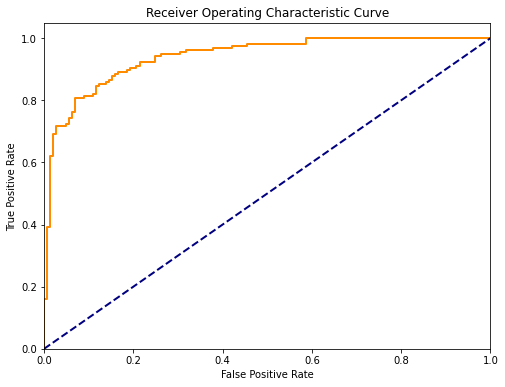

In [20]:
plot_roc_curve(fpr_skl, tpr_skl)

### Manual implementation

In [21]:
# please add your implementation here

In [22]:
# plot_roc_curve(df_sorted["fpr"], df_sorted["tpr"]) # df_sorted includes your computation for FPR and TPR

&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Exercise 05 <br>
2020 <br>